# Pythonでベイズ最適化を行うパッケージ GPyOpt
https://qiita.com/marshi/items/51b82a7b990d51bd98cd

In [1]:
import GPy
import GPyOpt
import numpy as np

In [20]:
def f(x):
    return np.cos(1.5*x) + 0.1*x
f(1.0)

0.1707372016677029

In [21]:
bounds = [{'name':'x', 'type':'continuous', 'domain':(0, 10)}]
myBopt = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds, 
                                            initial_design_numdata=5,
                                            acquisition_type='LCB')

The set cost function is ignored! LCB acquisition does not make sense with cost.


In [22]:
myBopt.run_optimization(max_iter=15)

In [23]:
print(myBopt.x_opt, myBopt.fx_opt)

[ 2.04958995] [-0.79278342]


In [24]:
myBopt.model.model

GP_regression.,value,constraints,priors
Mat52.variance,4.14541161684,+ve,
Mat52.lengthscale,2.25374355692,+ve,
Gaussian_noise.variance,1.00000029067e-09,"1e-09,1000000.0",


In [25]:
myBopt.model.model.predict

<bound method GP.predict of <GPy.models.gp_regression.GPRegression object at 0x000000000D43E898>>

In [26]:
myBopt.X, myBopt.Y

(array([[  4.29887726],
        [  7.79633127],
        [  5.55305767],
        [  5.20277394],
        [  3.24701331],
        [  5.92638807],
        [  1.84464573],
        [  0.34553845],
        [  2.30993292],
        [ 10.        ],
        [  2.06493529],
        [  2.00050567],
        [  2.04445737],
        [  2.04851721],
        [  2.04896228],
        [  2.04919281],
        [  2.04934229],
        [  2.04944846],
        [  2.04952331],
        [  2.04958995]]), array([[ 1.41628462],
        [ 1.42302642],
        [ 0.09742949],
        [ 0.57007751],
        [ 0.48217412],
        [-0.26752995],
        [-0.74618068],
        [ 0.90321266],
        [-0.71719676],
        [ 0.24031209],
        [-0.79253026],
        [-0.79004868],
        [-0.79275008],
        [-0.79278133],
        [-0.79278251],
        [-0.79278295],
        [-0.79278316],
        [-0.79278329],
        [-0.79278336],
        [-0.79278342]]))

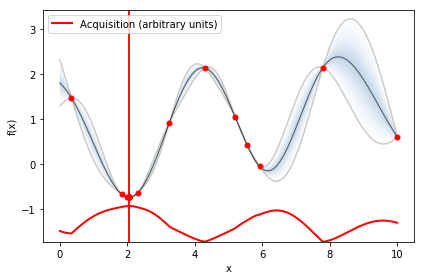

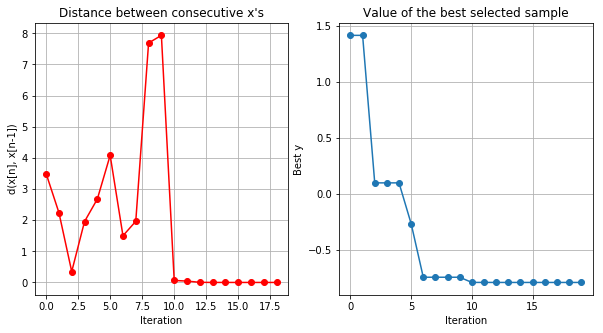

In [27]:
myBopt.plot_acquisition()
myBopt.plot_convergence()

In [12]:
# 二次元

def f(x):
    '''
    今回最適化する非線形関数
    '''
    x0,x1 = x[:,0],x[:,1]
    f0 = np.log(10.5-x0) + 0.1*np.sin(15*x0)
    f1 = np.cos(1.5*x0) + 0.1*x0
    return (1-x1)*f0 + x1*f1

bounds = [{'name': 'x0', 'type': 'continuous', 'domain': (0,10)},
          {'name': 'x1', 'type': 'discrete', 'domain': (0,1)}]
myBopt = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds)

myBopt.run_optimization(max_iter=30)

In [13]:
print(myBopt.x_opt, myBopt.fx_opt)

[ 2.07921652  1.        ] [-0.79181917]


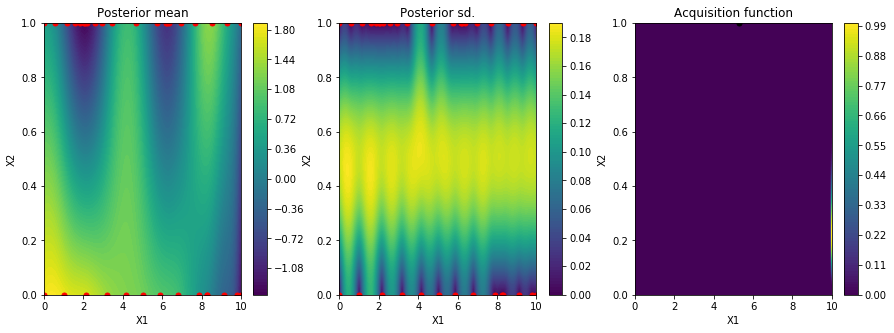

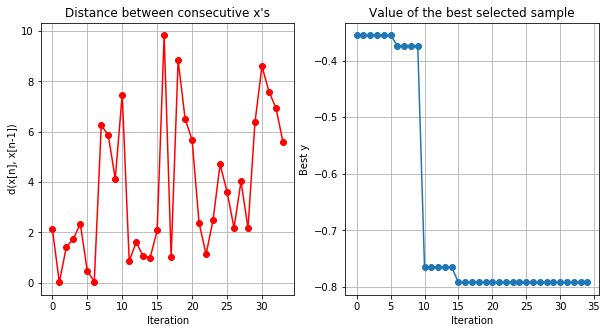

In [17]:
myBopt.plot_acquisition()
myBopt.plot_convergence()